#**GRIP @The Sparks Foundation**
##**Role : Data Science And Business Analytics Internship**
##**Author : Aditya Nair**
##**Task-1 : Predict the percentage of student based on no.of study hours**

###***Task-Strategy: This is a simple linear regression task because here we only have two variables i.e Hours and Score where hours is the independent variable and Score being the dependent variable. All we have to do is train a LinearRegression Model that can fit a linear/straight line across the data points.***

###***Technical-Stack Used -> Pandas , Numpy , Scikit , Matplotlib***


####**Step-1->Import the necessary Libraries Requrired**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

####**Step-2->Reading the data from the source provided**

In [29]:
data = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv' #get the url and store it in the data variable
df = pd.read_csv(data , sep= ',')
print("data is imported successfully")

data is imported successfully


In [30]:
df.head(10) #Explore the first 10 data entries that we have

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**NOTE:Also at this stage while you are exploring the dataset it is good idea to check for any missing values**

In [31]:
df.isnull().sum() #check for any missing values

Hours     0
Scores    0
dtype: int64

In [32]:
df.describe()#gives the description regarding its mean , standard deviation,etc..

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


####**Step-3->Data Visualization Using different kinds of Graphs**

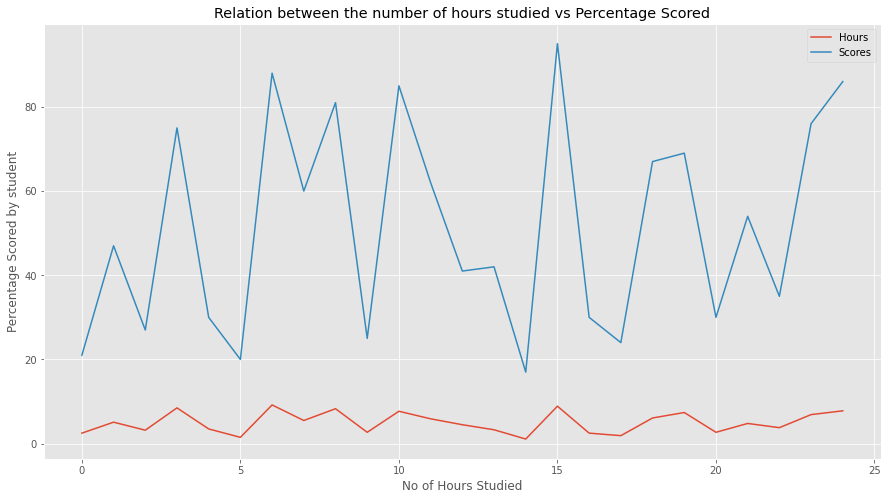

In [33]:
plt.style.use('ggplot')
df.plot(kind = 'line' , figsize = (15 , 8))
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

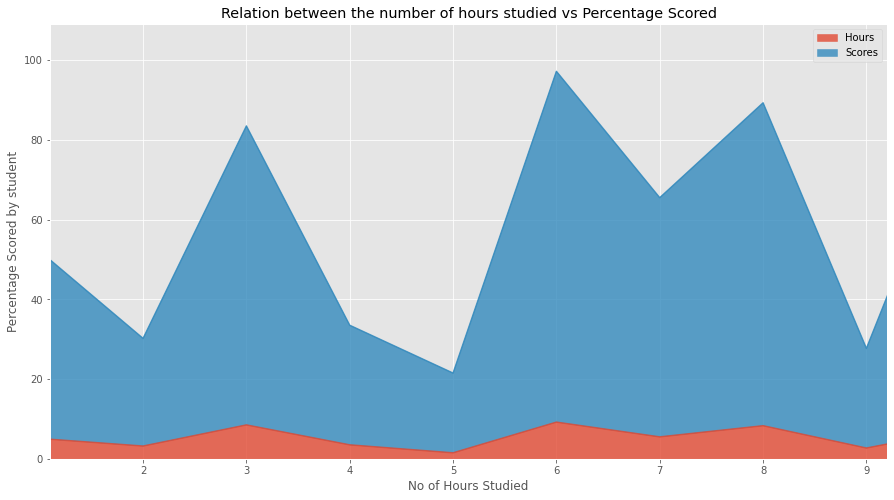

In [34]:
df.plot(kind = 'area' , alpha = 0.8 , stacked = True , figsize = (15 , 8) ,  xlim = (min(df.Hours) , max(df.Hours)))
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

**NOTE->This next plot also know as scatter plot gives us a very precise insight on the fact that we have a positive linear relation between our independent variable "No Of Hours" and dependent variable "Score"**

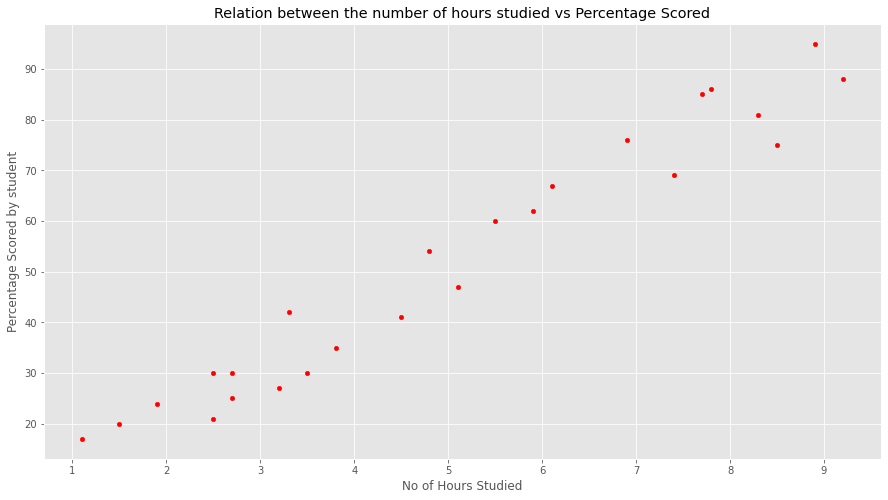

In [35]:
df.plot(kind = 'scatter' , x = 'Hours' , y = 'Scores' , color = 'r' , figsize = (15 , 8))
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

####**Step-4->Data Preprocessing and Model Training**

In [36]:
x=np.asanyarray(df[['Hours']])#create the input feature array
y = np.asanyarray(df['Scores']) #create the output label 
train_x , test_x , train_y , test_y = train_test_split(x , y , test_size = 0.2 ,random_state = 2 )#split the training and the test data
lineareg = LinearRegression()#initialize the linear regression object
lineareg.fit(train_x , train_y)#and train the model
print("Training Completed\n")
print("Coefficients : " , lineareg.coef_)
print("Intercept : " , lineareg.intercept_)

Training Completed

Coefficients :  [9.94061514]
Intercept :  1.5079104828268939


####**Step-5->Plotting the Linear Regression Line to the Data**

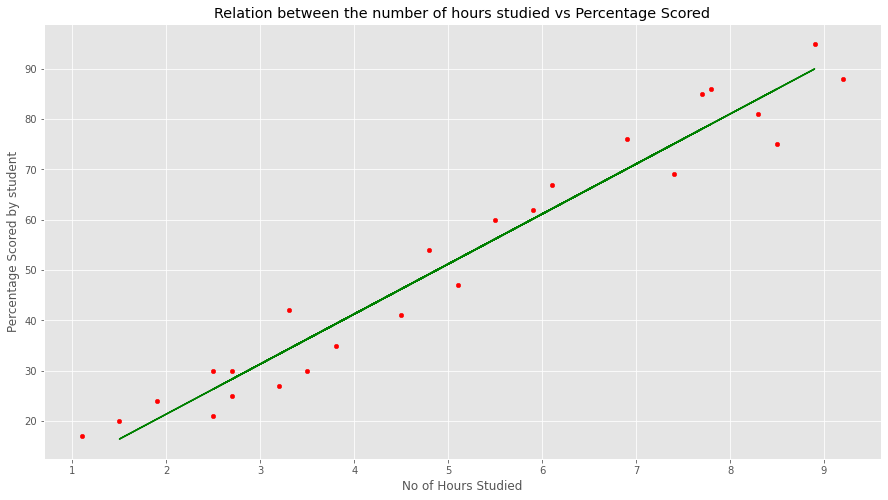

In [37]:
df.plot(kind = "scatter" , x = "Hours" , y = "Scores" , figsize = (15 , 8) , color = 'r')
plt.plot(train_x , lineareg.coef_[0]*train_x + lineareg.intercept_ , color = 'g' )
plt.title("Relation between the number of hours studied vs Percentage Scored")
plt.xlabel("No of Hours Studied")
plt.ylabel("Percentage Scored by student")
plt.show()

####**Step-6->Model Prediction Time**

In [38]:

y_target_label_predictor = lineareg.predict(test_x)


####**Step-7->Comparing the Actual Results to the Results predicted by the model**

In [39]:
df2 = pd.DataFrame({'Actual' : test_y , 'Predicted' : y_target_label_predictor})
df2


,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


In [40]:
#Displays the scores of our train and test results
print("Training Score : {} ".format(lineareg.score(train_x , train_y)))
print ("Test Score : {} ".format(lineareg.score(test_x , test_y)))

Training Score : 0.9423348138802985 
Test Score : 0.9735538080811826 


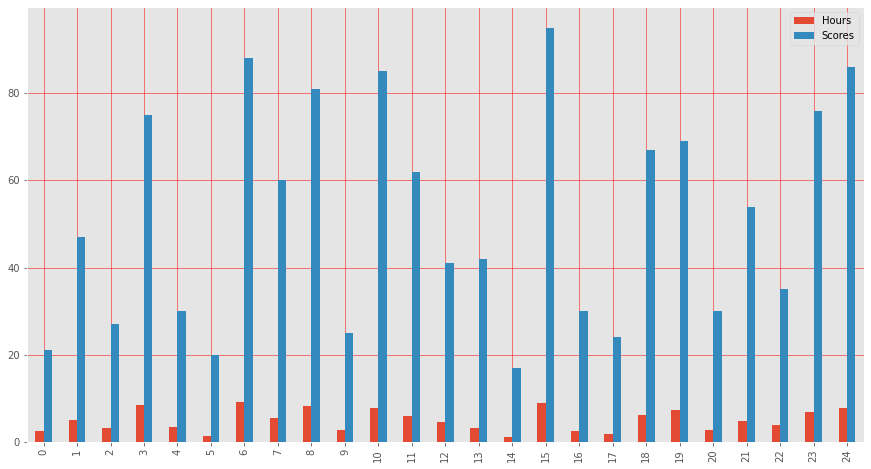

In [41]:
#Lets plot the graph of our Actual vs Predicted Results
df.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

In [42]:
#Lets test our model with the data we need to test upon given in the problem statement
hours = 9.25
final_score_predicted = lineareg.predict([[hours]])
print(f'No of hours : {hours}')
print(f'The final predicted score is : {final_score_predicted[0]}')

No of hours : 9.25
The final predicted score is : 93.45860055685799


####**Step-8->Evaluate The Model with the Metrics**
####**NOTE: The R2 Mertric that we use gives the actual accuracy for our model.Higher the R2 values higher is the accuracy. The Ideal/best score is 1**
**The final step is to evaluate the performance of model. This step gives us insights as to  how well different models perform on a given dataset. We will calculate different types of errors and compare the prediction accuracy and performance of our model**



In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Absolute Error is :{}".format(mean_absolute_error(test_y , y_target_label_predictor)))
print("Mean Squared Error is : {} ".format(mean_squared_error(test_y , y_target_label_predictor)))
print("R2 Score is : {}".format(r2_score(test_y , y_target_label_predictor)))

Mean Absolute Error is :4.877039354964476
Mean Squared Error is : 24.387620339856596 
R2 Score is : 0.9735538080811826


#**Conclusion -> Our Model has a very high value of R2 Score which is a good indicator that our model has been able to successfully capture the relationship between the two variables in the Linear Regression problem**